In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.ticker as mtick
import sqlite3
import seaborn as sns
from matplotlib.pyplot import figure
from bs4 import BeautifulSoup
import time
import requests     
import shutil       
import datetime
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')
import requests
import json
import xgboost
from xgboost import XGBClassifier
from random import randint
import  random
import os
os.chdir('C:/Users/tmcro/OneDrive/Data Science/Personal_Projects/Sports/UFC_Prediction')
from cmath import nan
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from sklearn.pipeline import Pipeline, make_pipeline, FeatureUnion
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.compose import make_column_selector as selector, ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
import pickle
from sklearn.metrics import fbeta_score
import winsound
from sklearn.linear_model import LinearRegression
from sklearn import tree, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix, recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc, f1_score, make_scorer, recall_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [2]:

df  = pd.read_csv('data/ufc_stats/agg2/all_fights_9_27_V9_CLEAN.csv') # .650
print(df.shape)
df.head(3)

(8000, 350)


,Fighter_A,Fighter_B,details,event_title,event_url,date,Winner,Fighter_A_Odds_obf,Fighter_B_Odds_obf,A_Rolling_Kd_mean,...,B_Height,Dif_Height,A_Reach,B_Reach,Dif_Reach,A_Leg_Reach,B_Leg_Reach,Dif_Leg_Reach,win?,favorite?
0,Anthony Hernandez,Marc-Andre Barriault,Arm Triangle From Mount,UFC Fight Night: Sandhagen vs. Song,http://www.ufcstats.com/event-details/8d477c3f...,2022-09-17,Anthony Hernandez,-225.0,163.0,0.166667,...,73.0,-1.0,75.0,74.0,1.0,40.0,42.5,-2.5,1,1
1,Tanner Boser,Rodrigo Nascimento,Junichiro Kamijo ...,UFC Fight Night: Sandhagen vs. Song,http://www.ufcstats.com/event-details/8d477c3f...,2022-09-17,Rodrigo Nascimento,-180.0,140.0,0.142857,...,74.0,0.0,75.5,80.0,-4.5,43.0,43.0,0.0,0,1
2,Tony Gravely,Javid Basharat,Chris Lee ...,UFC Fight Night: Sandhagen vs. Song,http://www.ufcstats.com/event-details/8d477c3f...,2022-09-17,Javid Basharat,136.0,-188.0,0.600000,...,69.0,-4.0,69.0,69.0,0.0,38.0,39.5,-1.5,0,0


In [3]:
unnamed = [n for n in df.columns if 'Unnamed' in n]
df.drop(columns=unnamed, inplace=True)
#Identify columns with missing values
nothere = df.isna().sum()
nothere = pd.DataFrame(nothere)
nothere = nothere.loc[nothere[0] > 0]
nothere

,0


In [4]:
all_cols = df.columns.to_list()
all_cols

['Fighter_A',
 'Fighter_B',
 'details',
 'event_title',
 'event_url',
 'date',
 'Winner',
 'Fighter_A_Odds_obf',
 'Fighter_B_Odds_obf',
 'A_Rolling_Kd_mean',
 'B_Rolling_Kd_mean',
 'A_Rolling_Kd_std',
 'B_Rolling_Kd_std',
 'A_Rolling_Kd_max',
 'B_Rolling_Kd_max',
 'A_Rolling_Kd_min',
 'B_Rolling_Kd_min',
 'A_Rolling_Kd_median',
 'B_Rolling_Kd_median',
 'A_Rolling_Sig_strike_land_mean',
 'B_Rolling_Sig_strike_land_mean',
 'A_Rolling_Sig_strike_land_std',
 'B_Rolling_Sig_strike_land_std',
 'A_Rolling_Sig_strike_land_max',
 'B_Rolling_Sig_strike_land_max',
 'A_Rolling_Sig_strike_land_min',
 'B_Rolling_Sig_strike_land_min',
 'A_Rolling_Sig_strike_land_median',
 'B_Rolling_Sig_strike_land_median',
 'A_Rolling_Sig_strike_att_mean',
 'B_Rolling_Sig_strike_att_mean',
 'A_Rolling_Sig_strike_att_std',
 'B_Rolling_Sig_strike_att_std',
 'A_Rolling_Sig_strike_att_max',
 'B_Rolling_Sig_strike_att_max',
 'A_Rolling_Sig_strike_att_min',
 'B_Rolling_Sig_strike_att_min',
 'A_Rolling_Sig_strike_att_media

In [5]:
#df.drop(columns=in_fight_cols, inplace=True)
#df.drop(columns=in_fight_difs, inplace=True)
colz = list(df.columns)
# get favorite
#df['favorite?'] = np.where(df['Fighter_A_Odds_obf'] < 0, 1, 0)

In [6]:
#df['win?']  = np.where(df['Winner'] == df['Fighter_A'], 1, 0)

In [7]:
# check value counts
df['win?'].value_counts()

1    4000
0    4000
Name: win?, dtype: int64

In [8]:
fav_check = df.groupby('favorite?')['win?'].value_counts()
fav_check

favorite?  win?
0          0       2460
           1       1244
1          1       2756
           0       1540
Name: win?, dtype: int64

In [9]:
# Check how often winner is favorite
fav = df.loc[df['favorite?'] == 1]
fav['win?'].value_counts()

1    2756
0    1540
Name: win?, dtype: int64

In [10]:
2756/(2756+ 1540)

0.6415270018621974

#### Assign Target and Split

In [11]:
target_name = "win?"
y = df[target_name]
X = df.drop(columns=[target_name])

# drop columns you dont want to use
to_drop = ['event_title','event_url','date', 'details', 'Fighter_A', 'Fighter_B', 'Winner' ]  # sometimes 'event_id' needed
X = X.drop(columns=to_drop)

# Scoring Metric
class_metric = 'accuracy'

In [12]:
numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

numerical_columns = numerical_columns_selector(X)
categorical_columns = categorical_columns_selector(X)

categorical_columns

[]

In [13]:
numerical_columns

['Fighter_A_Odds_obf',
 'Fighter_B_Odds_obf',
 'A_Rolling_Kd_mean',
 'B_Rolling_Kd_mean',
 'A_Rolling_Kd_std',
 'B_Rolling_Kd_std',
 'A_Rolling_Kd_max',
 'B_Rolling_Kd_max',
 'A_Rolling_Kd_min',
 'B_Rolling_Kd_min',
 'A_Rolling_Kd_median',
 'B_Rolling_Kd_median',
 'A_Rolling_Sig_strike_land_mean',
 'B_Rolling_Sig_strike_land_mean',
 'A_Rolling_Sig_strike_land_std',
 'B_Rolling_Sig_strike_land_std',
 'A_Rolling_Sig_strike_land_max',
 'B_Rolling_Sig_strike_land_max',
 'A_Rolling_Sig_strike_land_min',
 'B_Rolling_Sig_strike_land_min',
 'A_Rolling_Sig_strike_land_median',
 'B_Rolling_Sig_strike_land_median',
 'A_Rolling_Sig_strike_att_mean',
 'B_Rolling_Sig_strike_att_mean',
 'A_Rolling_Sig_strike_att_std',
 'B_Rolling_Sig_strike_att_std',
 'A_Rolling_Sig_strike_att_max',
 'B_Rolling_Sig_strike_att_max',
 'A_Rolling_Sig_strike_att_min',
 'B_Rolling_Sig_strike_att_min',
 'A_Rolling_Sig_strike_att_median',
 'B_Rolling_Sig_strike_att_median',
 'A_Rolling_Sig_strike_percent_mean',
 'B_Rolling_

In [14]:
numerical_columns.remove('favorite?')
categorical_columns.append('favorite?')

In [15]:
col_list = X.columns.to_list()

#### Split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [17]:
catcols = []

for col in categorical_columns:
    ind = col_list.index(col)
    catcols.append(ind)

catcols

[341]

In [18]:
cont_cols_index = [n for n in range(len(X_train.columns)) if n not in catcols]

In [19]:
# To get the column names from onehotencoder
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
checker = ohe.fit_transform(X_train[categorical_columns])

In [20]:
feature_names_categorical = ohe.get_feature_names(categorical_columns)

### Preprocessing

In [21]:
# pipeline for categorical data
cat_preprocessing = make_pipeline(
    OneHotEncoder(handle_unknown="ignore", sparse=False),
)
# pipeline for numerical data
num_preprocessing = make_pipeline(StandardScaler())

# combine both pipeline using a columnTransformer
preprocessing = ColumnTransformer(
    [("num", num_preprocessing, cont_cols_index), ("cat", cat_preprocessing, catcols)]
)

preprocessing

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                  14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
                                  25, 26, 27, 28, 29, ...]),
                                ('cat',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 [341])])

### Function Additions

In [22]:
# SOURCE: The origin of this confusion matrix code was found on medium, '
# from https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):

    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            a = cf[0,0]
            b = cf[0,1]
            c = cf[1,0]
            d = cf[1,1]
            tn = ((a / (a+b))*100).round(2).astype(str) + '%'
            fp = ((b / (a+b))*100).round(2).astype(str) + '%'
            fn = ((c / (c+d))*100).round(2).astype(str) + '%'
            tp = ((d / (c+d))*100).round(2).astype(str) + '%'
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            rwf_score = (1+(2**2)) * ((precision * recall) / (((2**2) * precision) + recall))
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}\n\nRecall-Weighted F Score={:0.3f}".format(
                accuracy,precision,recall,f1_score, rwf_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""

    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages =  [tn,fp,fn,tp]
        # old = group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])

    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label', weight = 'bold')
        plt.xlabel('Predicted label' + stats_text, weight = 'bold')
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title,size = 20, weight = 'bold')

In [23]:
dfcols = ['Model', 'RWF Score', 'F1',  'Recall',  'Precision',  'Accuracy']
model_summary = pd.DataFrame(columns=dfcols)
model_summary

,Model,RWF Score,F1,Recall,Precision,Accuracy


In [24]:
# Define Result Saving Initial Function
def save_result_w_matrix(cf,cv_mean_accuracy, cv_std_accuracy, model_name):
            global model_summary
            accuracy  = np.trace(cf) / float(np.sum(cf))
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            f_beta = (1+(.5**2)) * ((precision * recall) / (((.5**2) * precision) + recall))
            row = [(model_name, f_beta, f1_score, recall, precision, accuracy, cv_mean_accuracy, cv_std_accuracy)]
            res = pd.DataFrame(columns = dfcols, data = row)
            yeep = [model_summary, res]
            model_summary = pd.concat(yeep)
            model_summary = model_summary.sort_values('Accuracy', ascending = False)
            model_summary = model_summary.drop_duplicates()
            return model_summary.round(3)

In [25]:
def save_result(cv_mean_accuracy, cv_std_accuracy, model_name):
            global model_summary2
            row = [(model_name, cv_mean_accuracy, cv_std_accuracy)]
            res = pd.DataFrame(columns = dfcols2, data = row)
            yeep = [model_summary2, res]
            model_summary2 = pd.concat(yeep)
            model_summary2 = model_summary2.sort_values('Cv_Mean_Accuracy', ascending = False)
            model_summary2 = model_summary2.drop_duplicates()
            return model_summary2.round(3)

In [26]:
# Function runs model, fits it, and saves the results
def run_model(model, model_name):
    model.fit(X_train, y_train)
    model_prediction = model.predict(X_test)
    cf_matrix = confusion_matrix(y_test, model_prediction)
    save_result(cf_matrix, model_name)
    cf = make_confusion_matrix(cf_matrix)
    return model_summary

In [27]:
dfcols2 = ['Model', 'Cv_Mean_Accuracy', 'Cv_Std']
model_summary2 = pd.DataFrame(columns=dfcols2)
model_summary2

,Model,Cv_Mean_Accuracy,Cv_Std


In [28]:
def make_cf(model):
    #load pickle file
    with open(model, 'rb') as f:
        model = pickle.load(f)
    #get predictions
    y_pred = model.predict(X_test)
    cf = plot_confusion_matrix(model, y_test, y_pred)
    return cf

In [36]:
# Function creates a pipeline, runs it, saves the result, and saves a pickle file

def create_fullpipe(preprocessing, model, model_name):
    fullpipe = Pipeline(steps=[('preprocess', preprocessing), ('model', model)])
    fullpipe.fit(X_train, y_train)
    # cross validation
    cv = cross_val_score(fullpipe, X_test, y_test, cv=3, scoring='accuracy')
    cv_mean = cv.mean()
    cv_std = cv.std()
    res = save_result(cv_mean, cv_std, model_name)
    # pickle model
    pickle.dump(fullpipe, open(f'{model_name}.pkl', 'wb'))
    # return confusion matrix
    y_pred = fullpipe.predict(X_test)
    cf = confusion_matrix(y_test, y_pred)
    cf = make_confusion_matrix(cf)
    return cf

In [41]:
et = pickle.load(open('data/models/Extra_Trees_Gridsearched_7.pkl', 'rb'))

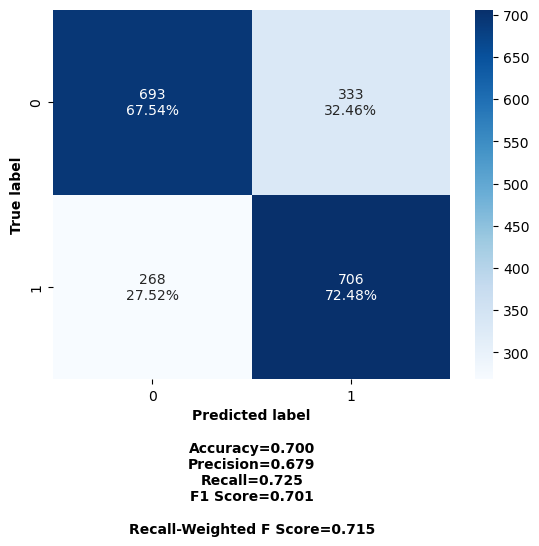

In [42]:
# get confusion matrix from et
y_pred = et.predict(X_test)
cf = confusion_matrix(y_test, y_pred)
cf = make_confusion_matrix(cf)

### Run Vanilla Models

In [30]:
create_fullpipe(preprocessing, LogisticRegression(), 'Logistic_Regression')
create_fullpipe(preprocessing, RandomForestClassifier(), 'Random_Forest')
create_fullpipe(preprocessing, DecisionTreeClassifier(), 'Decision_Tree')
create_fullpipe(preprocessing, BaggingClassifier(), 'Bagged_Trees')
create_fullpipe(preprocessing, ExtraTreesClassifier(), 'Extra_Trees')
create_fullpipe(preprocessing, KNeighborsClassifier(), 'K_Neighbors')
create_fullpipe(preprocessing, SVC(), 'SVC')
create_fullpipe(preprocessing, XGBClassifier(eval_metric = 'logloss'), 'XGBoost')

,Model,Cv_Mean_Accuracy,Cv_Std
0,SVC,0.696,0.008
0,Random_Forest,0.683,0.012
0,Extra_Trees,0.681,0.005
0,XGBoost,0.679,0.008
0,Logistic_Regression,0.667,0.015
0,Bagged_Trees,0.658,0.013
0,K_Neighbors,0.616,0.008
0,Decision_Tree,0.606,0.009


In [31]:
# Function cross validates a model and saves the result and a pickle file
def gridsearched_model(model, model_name):
    cv = cross_val_score(model, X_test, y_test, cv=3, scoring='accuracy')
    cv_mean = cv.mean()
    cv_std = cv.std()
    res = save_result(cv_mean, cv_std, model_name)
    # pickle model
    pickle.dump(model, open(f'{model_name}.pkl', 'wb'))
    # make confusion matrix
    return res

In [32]:
# This function is an edited (to fit my purposes) version of a function found on medium.com
def GridSearch_table_plot(grid_clf, param_name,
                          num_results=15,
                          negative=False,
                          graph=True,
                          display_all_params=True):

    from matplotlib      import pyplot as plt
    from IPython.display import display

    clf = grid_clf.best_estimator_
    clf_params = grid_clf.best_params_
    clf_score = grid_clf.best_score_
    clf_stdev = grid_clf.cv_results_['std_test_score'][grid_clf.best_index_]
    cv_results = grid_clf.cv_results_

    print("best parameters: {}".format(clf_params))
    print("best score:      {:0.5f} (+/-{:0.5f})".format(clf_score, clf_stdev))
    if display_all_params:
        import pprint
        pprint.pprint(clf.get_params())

    # pick out the best results
    scores_df = pd.DataFrame(cv_results).sort_values(by='rank_test_score')

    new_param = 'param_' + param_name
    best_row = scores_df.iloc[0, :]
    best_mean = best_row['mean_test_score']
    best_stdev = best_row['std_test_score']
    best_param = best_row[new_param]

    # display the top 'num_results' results
    display(pd.DataFrame(cv_results) \
            .sort_values(by='rank_test_score').head(num_results))

    # PLOT
    scores_df = scores_df.sort_values(by=new_param)

    means = scores_df['mean_test_score']
    stds = scores_df['std_test_score']
    params = scores_df[new_param]

    # plot
    if graph:
        plt.figure(figsize=(8, 8))
        try:
            plt.errorbar(params, means, yerr=stds)
            plt.axhline(y=best_mean + best_stdev, color='red')
            plt.axhline(y=best_mean - best_stdev, color='red')
            plt.plot(best_param, best_mean, 'or')
            plt.title(param_name + " vs Score\nBest Score {:0.5f}".format(clf_score))
            plt.xlabel(param_name)
            plt.ylabel('Score')
            plt.show()
        except:
            plt.plot(best_param, best_mean, 'or')
            plt.title(param_name + " vs Score\nBest Score {:0.5f}".format(clf_score))
            plt.xlabel(param_name)
            plt.ylabel('Score')
            plt.show()

In [35]:
# get a confusion matrix for the decision tree model
# load model from pickle file
with open('Decision_Tree.pkl', 'rb') as f:
    model = pickle.load(f)
make_confusion_matrix(model)

ValueError: diag requires an array of at least two dimensions